# Show different pitch types

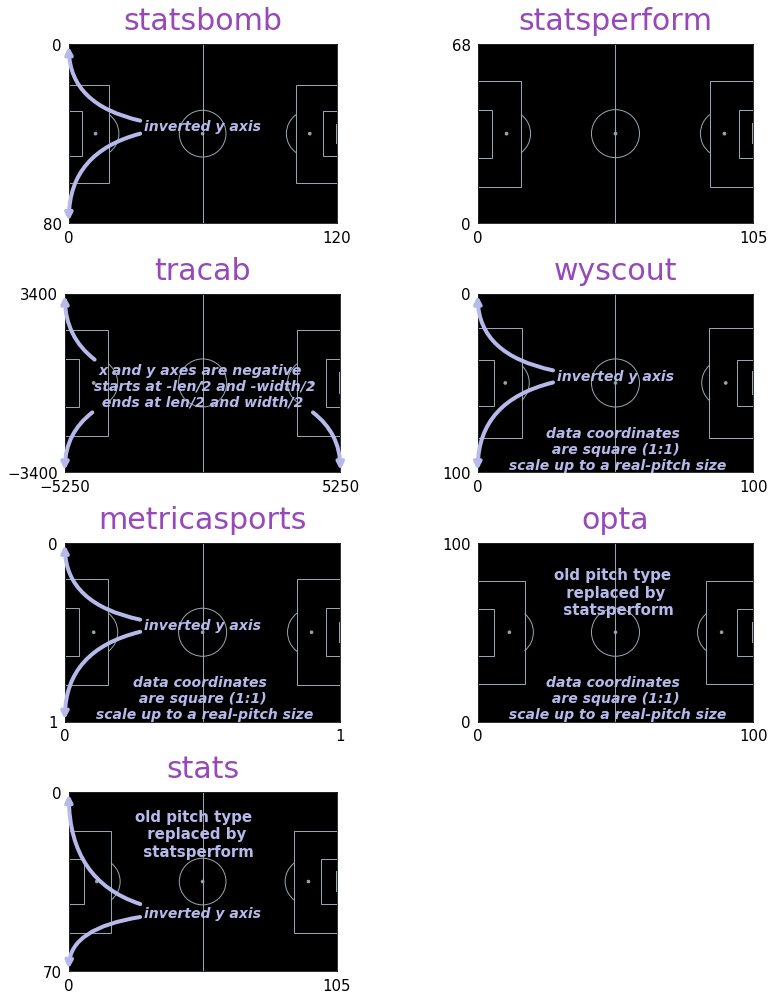

In [1]:
from mplsoccer.pitch import Pitch 
import matplotlib.pyplot as plt
import os
fig, axes = plt.subplots(4,2,figsize=(12,14))
axes = axes.ravel()
pitch_kwargs = {'pitch_color': 'black', 'line_color': '#94A7AE', 'axis':True, 'label': True, 'pad_left': 0,
                'pad_right': 0, 'pad_top': 0, 'pad_bottom': 0, 'linewidth': 1} 
pitch_types = ['statsbomb','statsperform','tracab','wyscout','metricasports','opta','stats']
fontcolor = '#b6b9ea'
arrowprops = {'arrowstyle': '->', 'lw': 4,
              'connectionstyle': 'angle3,angleA=0,angleB=-90', 'color': fontcolor}
font_kwargs = {'fontsize': 14, 'ha': 'center', 'va': 'bottom', 'fontweight': 'bold',
               'fontstyle': 'italic', 'c': fontcolor}
for idx, pt in enumerate(pitch_types):
    if pt in ['tracab','metricasports']:
        pitch = Pitch(pitch_type=pt, pitch_length=105, pitch_width=68, **pitch_kwargs)     
    else:
        pitch = Pitch(pitch_type=pt, **pitch_kwargs)
    pitch.draw(axes[idx])
    xmin, xmax, ymin, ymax = pitch.extent
    if pitch.aspect != 1:
        text = ('data coordinates \n are square (1:1) \n scale up to a real-pitch size')
        axes[idx].annotate(text, xy=(xmin,ymin), xytext=(0 + (xmax - xmin)/2, ymin),
                           **font_kwargs)
    axes[idx].xaxis.set_ticks([xmin,xmax])
    axes[idx].yaxis.set_ticks([ymin,ymax])
    axes[idx].tick_params(labelsize=15)
    axes[idx].set_title(pt, fontsize=30, c='#9749b9', pad=15)
    if pitch.invert_y: 
        text = 'inverted y axis'
        if pt =='stats':
            xytext = (0 + (xmax - xmin)/2, 50)
        else:
            xytext = (0 + (xmax - xmin)/2, ymin + (ymax - ymin)/2)            
        axes[idx].annotate(text, xy=(xmin,ymin), xytext=xytext,
                           arrowprops=arrowprops, **font_kwargs)
        axes[idx].annotate(text, xy=(xmin,ymax), xytext=xytext,
                           alpha=0, arrowprops=arrowprops, **font_kwargs)

    if xmin < 0:
        text = ('x and y axes are negative \n starts at -len/2 and -width/2'
               '\n ends at len/2 and width/2 ')
        axes[idx].annotate(text, xy = (xmin,ymin), xytext = (0,-1000),
                           arrowprops=arrowprops, **font_kwargs)
        axes[idx].annotate(text,xy = (xmax,ymin), xytext = (0,-1000),
                           alpha=0, arrowprops=arrowprops, **font_kwargs)
        axes[idx].annotate(text,xy = (xmin,ymax), xytext = (0,-1000),
                           alpha=0, arrowprops=arrowprops, **font_kwargs)
    if pt in ['opta','stats']:
        if pt == 'opta':
            xy = (50,60)
        else:
            xy = (50,25)
        axes[idx].annotate('old pitch type \n replaced by \n statsperform', c='#b6b9ea',
                           xy = xy,
                           fontsize = 15, horizontalalignment = 'center',
                           fontweight='bold')
axes[-1].remove()
fig.tight_layout()
fig.savefig(os.path.join('figures','README_pitch_type.png'))

# Minimal pitch example

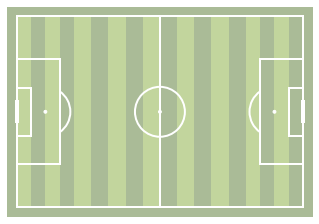

In [8]:
from mplsoccer.pitch import Pitch
import os
pitch = Pitch(orientation='horizontal',figsize=(5,3),stripe=True)
fig, ax = pitch.draw()
fig.savefig(os.path.join('figures','README_example_statsbomb_pitch.png'),pad_inches=0,bbox_inches='tight')

# Existing axis example

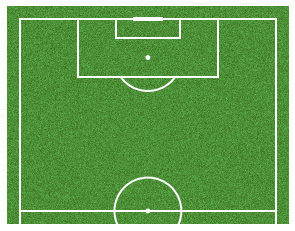

In [9]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
import os
pitch = Pitch(orientation='vertical', view='half', pitch_color='grass')
fig, ax = plt.subplots(figsize=(6,4))
pitch.draw(ax=ax)
fig.savefig(os.path.join('figures','README_example_existing_axis.png'),pad_inches=0,bbox_inches='tight')

# Xkcd example

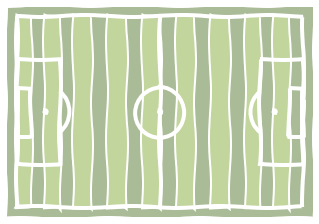

In [4]:
from mplsoccer.pitch import Pitch
import matplotlib.pyplot as plt
plt.xkcd()
pitch = Pitch(orientation='horizontal',figsize=(5,3),stripe=True)
fig, ax = pitch.draw()
fig.savefig(os.path.join('figures','README_example_xkcd_pitch.png'),pad_inches=0,bbox_inches='tight')
plt.xkcd(False)